# Notebook version

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
from scipy.special import erf
from pycqed.analysis import analysis_toolbox as a_tools
a_tools.datadir = 'Q:\\USERS\\nathan\\data' 
a_tools.datadir

c:\users\nathan\masterthesis\code\controlsoftware\pycqed_py3\data
Data directory set to: c:\users\nathan\masterthesis\code\controlsoftware\pycqed_py3\data


'Q:\\USERS\\nathan\\data'

In [12]:
def getLine(p1, p2, eps=1e-30):
        """
        p1 is a tuple of the first point
        p2 is a tuple of the second point
        returns a tuple of the slope and y-intercept of the line going throug both points
        """
        
        if abs(p1[0] - p2[0]) < eps:
            slope = 1/eps
        else:
            slope = float((p1[1] - p2[1]) / (p1[0] - p2[0]))
        yint = float((-1 * (p1[0])) * slope + p1[1])
        #print(p1,p2)
        #print("line", (slope, yint))
        return (slope, yint)

            
def getIntersection(line1, line2):
    """
    line1 is a tuple of m and b of the line in the form y=mx+b
    line2 is a tuple of m and b of the line in the form y=mx+b
    returns a tuple of the points of the intersection of the two lines
    """
    slope1, slope2 = line1[0], line2[0]
    yint1, yint2 = line1[1], line2[1]
    matA = np.matrix(str(-1 * slope1) + ' 1;' + str(-1 * slope2) + ' 1')
    matB = np.matrix(str(yint1) + '; ' + str(yint2))
    invA = matA.getI()
    resultant = invA * matB
    return (resultant[0,0], resultant[1,0])
def getMidpoint(p1, p2):
    """
    p1 is a tuple of the first point
    p2 is a tuple of the second point
    returns the midpoint, in tuple form, of p1 and p2
    """
    return(((p1[0] + p2[0]) / 2.), ((p1[1] + p2[1]) / 2.))
def perpSlope(slope, eps=1e-30):
    #takes slope(float) and returns the slope of a line perpendicular to it
    # nearly 0 slope, return high slope
    if abs(slope) < eps:
        return 1/eps
    else:
        return (slope * -1) ** -1

        
def distance(p1, p2):
    """
    p1 is a tuple of ...
    p2 is a tuple of ...
    returns float of distance between p1 and p2
    """
    return(float(np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)))
def lineFromSlope(slope, point):
    """
    slope is a float of slope
    point is a tuple of ...
    returns tuple of slope and y intercept
    """
    return (slope, ((slope * (-1 * point[0])) +  point[1]))

def angle(pt1, pt2):
    x1, y1 = pt1
    x2, y2 = pt2
    inner_product = x1*x2 + y1*y2
    len1 = math.hypot(x1, y1)
    len2 = math.hypot(x2, y2)
    return math.acos(inner_product/(len1*len2))

def angle3pt(a, b, c):
    """Counterclockwise angle in degrees by turning from a to c around b
        Returns a float between 0.0 and 360.0"""
    ang = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    while ang < - np.pi or ang > np.pi:
        if ang< -np.pi:
            ang += 2*np.pi
        elif ang > np.pi:
            ang -= 2*np.pi
    return ang
def rotate(pt, angle):
    pt = np.asarray(pt)
    rot_mx = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])
    return tuple(np.matmul(rot_mx, pt))

def circumcenter(point1, point2, point3, show=False, ax=None):
    mid1 = getMidpoint(point1, point2)
    mid2 = getMidpoint(point2, point3)
    #print(mid1, mid2)
    line1 = getLine(point1, point2)
    line2 = getLine(point2, point3)
    #print(line1, line2)
    perp1 = perpSlope(line1[0])
    perp2 = perpSlope(line2[0])
    #print(perp1, perp2)
    perpbi1 = lineFromSlope(perp1, mid1)
    perpbi2 = lineFromSlope(perp2, mid2)
    circumcent = getIntersection(perpbi1, perpbi2)
    radius = distance(circumcent, point1)
    if show == True:
        xList = [point1[0], point2[0], point3[0], point1[0]]
        yList = [point1[1], point2[1], point3[1], point1[1]]
        if ax is not None:
            ax.plot(xList, yList)
            ax.scatter(circumcent[0], circumcent[1])
        else:
            plt.plot(xList, yList)
            plt.scatter(circumcent[0], circumcent[1])
        print('circumcenter: (' + str(circumcent[0]) + ', ' + str(circumcent[1]) + ')')
        print('circumcircle radius: %f' % (radius))
        plt.show()
    return circumcent, radius

def g(x,d, sigma=0.1):
    while (x < -np.pi or x > np.pi):
        if x < np.pi:
            x += 2 * np.pi
        elif x > np.pi:
            x -= 2 * np.pi

    return np.exp(-d**2 / np.cos(x)**2 / (2 * sigma**2)) if (x >= -np.pi/2 and x <= np.pi/2) else np.exp(-d**2/np.cos(x)**2/(2*sigma**2))

In [60]:
def lor(kappa, freq, chi):
    v = 1./(kappa/2+1j*(freq+chi))
    return (np.real(v), np.imag(v))

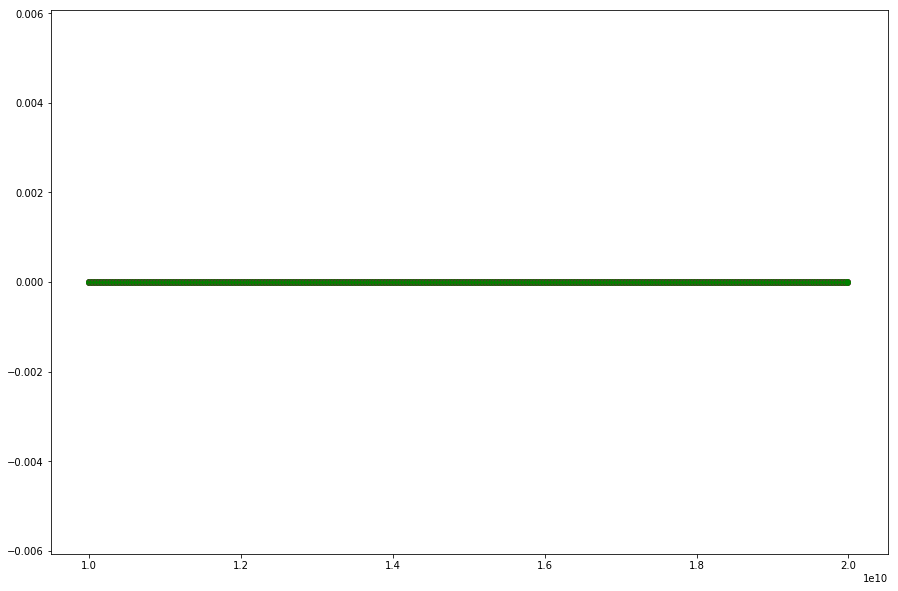

-12.566370614359172


In [131]:
w = np.arange(-4*np.pi,4*np.pi,0.05)
w2 = np.arange(10e9,20e9,20e6)
verbose = True
sigma = 1
fig, ax = plt.subplots(figsize=(15,10))
i1s, i2s, i3s = [],[],[]
traces_theory = dict(g=np.array([lor(8e6, i, 0)[0] + 1j*lor(8e6, i, 0)[1] for i in w2]),
                     e=np.array([lor(8e6, i, -3.5e6)[0] + 1j*lor(8e6, i, -3.5e6)[1] for i in w2]),
                     f=np.array([lor(8e6, i, -5e6)[0] + 1j*lor(8e6, i, -5e6)[1] for i in w2]))


for i in w2:
    pt1 = lor(20e6, i, 0) # lor(2, i, 0) #(0,0.)
    pt2 = lor(20e6, i, -3.5e6) #lor(2, i, -3.5) #(1.,0.)
    pt3 = lor(20e6, i, -5e6) #lor(2, i, -5) #(i,np.sqrt(3)/2)
    d1 = distance(pt1, pt2)/2
    d2 = distance(pt2,pt3)/2
    d3 = distance(pt1,pt3)/2
    #translate to point1
    pt2 = tuple(np.asarray(pt2) - np.asarray(pt1))
    pt3 = tuple(np.asarray(pt3) - np.asarray(pt1))
    pt1 = (0.,0.)
    c, R = circumcenter(pt2, pt3 ,pt1, show=False)
    gamma1 = np.arccos(d1/R)
    gamma2 = np.arccos(d2/R) #if angle3pt(pt3,pt2, c) > 0  else - np.arccos(d2/R)
    gamma3 = np.arccos(d3/R) #if angle3pt(pt1,pt3, c) > 0 else - np.arccos(d3/R)
    i1 = integrate.quad(lambda x: 1/(2*np.pi), gamma1-np.pi, gamma1)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d1,sigma=sigma), gamma1-np.pi, gamma1)[0]
    i2 = integrate.quad(lambda x: 1/(2*np.pi), gamma2-np.pi, gamma2)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d2, sigma=sigma), gamma2-np.pi, gamma2)[0]
    i3 = integrate.quad(lambda x: 1/(2*np.pi), gamma3-np.pi, gamma3)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d3,sigma=sigma), gamma3-np.pi, gamma3)[0]
    #i1 = integrate.quad(lambda x: erf(d1/np.cos(x)), gamma1-np.pi, gamma1)[0]
    #i2 =  integrate.quad(lambda x: erf(d2/np.cos(x)), gamma2-np.pi, gamma2)[0]
    #i3 = integrate.quad(lambda x: erf(d3/np.cos(x)), gamma3-np.pi, gamma3)[0]
    i1s.append(i1)
    i2s.append(i2)
    i3s.append(i3)

#     ixy1 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d1, lambda x: -np.inf, lambda x: getLine((0.,0.),c)[0]*x)[0]
#     a2= angle((1,0),pt2) - np.pi
#     c2 = rotate(c, a2)
#     c2 = tuple(np.array(c2) - np.array(pt2))
#     ixy2 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d2, lambda x: -np.inf, lambda x: getLine((0.,0.),c2)[0]*x)[0]
#     a3 = angle((1,0),pt3) - np.pi
#     c3 = rotate(c, a3)
#     c3 = tuple(np.array(c3) - np.array(pt3))
#     ixy3 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d3, lambda x: -np.inf, lambda x: getLine((0.,0.),c3)[0]*x)[0]
    if verbose:
        #print("d1 = {} d2 = {} d3 = {}".format(d1, d2, d3))
        #print("c = {} R = {}".format(c, R))
        #print("g1 = {} g2 = {} g3 = {}".format(gamma1, gamma2, gamma3))
        #print("i1 = {} i2 = {} i3 = {}".format(i1, 0, 0))
        #print("angle 2 = {}, angle3 = {}".format(angle3pt(pt3,pt2, c),angle3pt(pt1,pt3, c)))
        #ax.scatter(i, gamma1, color='m')
        #ax.scatter(i, gamma2, color='y')
        #ax.scatter(i, gamma3, color='orange')
        #ax.scatter(i, g(i,d1), color='k')
        ax.scatter(i, i1, color='b')
        ax.scatter(i, i2, color='r')
        ax.scatter(i, i3, color='g')
#         ax.scatter(i, ixy1, color='cyan')
#         ax.scatter(i, ixy2, color='k')
#         ax.scatter(i, ixy3, color='orange')
       
        
if verbose:
    #ax.set_xlim([-1,2])
    plt.show()
    print(w[np.argmax(np.array(i1s) + np.array(i2s) + np.array(i3s))])

In [65]:
%matplotlib inline

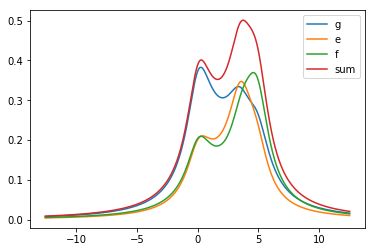

In [70]:
plt.plot(w, np.array(i1s) + np.array(i3s), label = "g" )
plt.plot(w, np.array(i1s) + np.array(i2s), label = "e" )
plt.plot(w, np.array(i2s) + np.array(i3s), label = "f" )
plt.plot(w, np.array(i2s) + np.array(i3s) + np.array(i1s), label="sum")
plt.legend()
#plt.plot(w, np.array(ixy1s) + np.array(i2s) + np.array(i3s))
#plt.xlim([0.45,0.55])
#plt.ylim([0,0.003])

In [50]:
def gauss_int(x1, x2):
    return integrate.quad(lambda x: np.exp(-x**2), a, b)[0] 
def gauss2D(x1,x2,y1,y2):
    return integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), x1, x2, lambda x: y1, lambda x: y2)
    

In [52]:
gauss2D(0,0.5,-np.inf,np.inf)

(0.2602499389065229, 1.091658020508317e-08)

In [53]:
gauss2D(-np.inf,0.5,-np.inf,0)

(0.38012496945326135, 1.4216227882708125e-08)

In [40]:

integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, 0.5, lambda x: -np.inf, lambda x: 0)

(0.38012496945326135, 1.4216227882708098e-08)

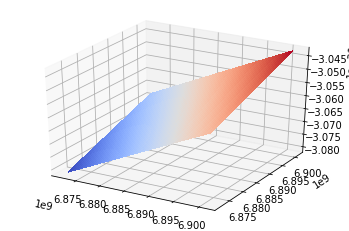

In [95]:
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.surface_plot()
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = w
Y = w
X, Y = np.meshgrid(X, Y)
Z1 = lor(2,X,0)[0] * lor(4,Y,0)[1]
Z2 = lor(2,X,-3.5)[0] * lor(4,Y,-3.5)[1]
Z3 = lor(2,X,-7)[0] * lor(4,Y,-7)[1]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z1, cmap='coolwarm',
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, Z2, cmap='viridis',
                       linewidth=0, antialiased=False)
surf = ax.plot_surface(X, Y, Z3, cmap='jet',
                       linewidth=0, antialiased=False)

In [376]:
#%matplotlib inline
%matplotlib qt

-5
circumcenter: (0.24999999999999983, 1.6653345369377348e-16)
circumcircle radius: 0.250000


<Figure size 432x288 with 0 Axes>

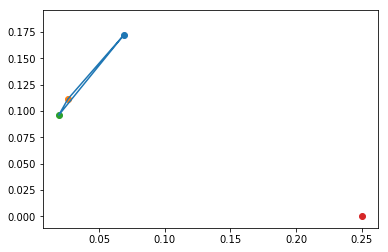

-3
circumcenter: (0.24999999999999992, 1.1102230246251565e-16)
circumcircle radius: 0.250000


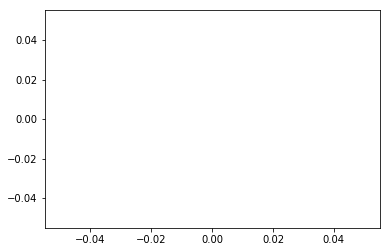

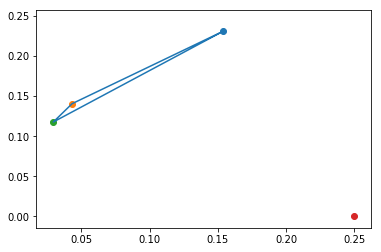

0
circumcenter: (0.25, 0.0)
circumcircle radius: 0.250000


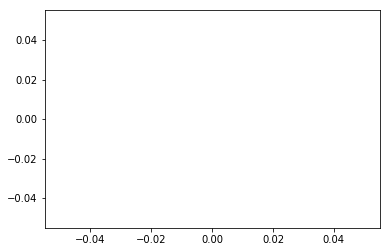

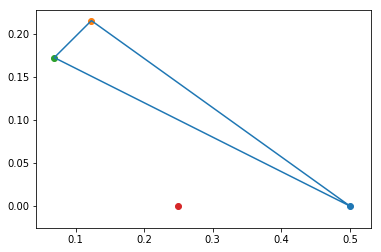

1
circumcenter: (0.24999999999999997, -1.3877787807814457e-17)
circumcircle radius: 0.250000


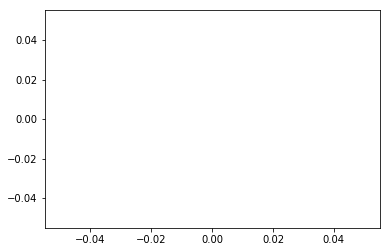

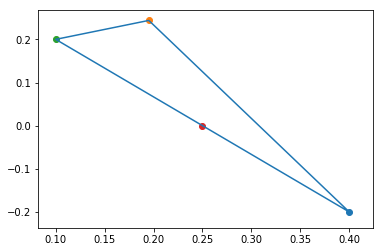

3
circumcenter: (0.24999999999999994, 0.0)
circumcircle radius: 0.250000


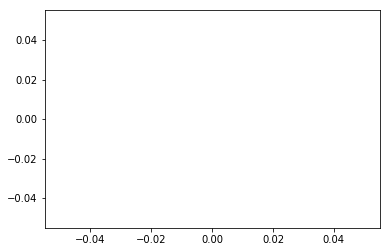

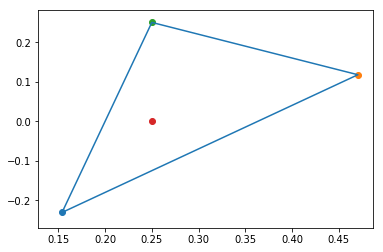

4
circumcenter: (0.24999999999999997, 2.0816681711721685e-17)
circumcircle radius: 0.250000


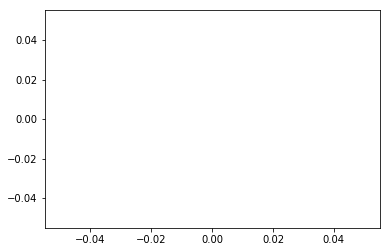

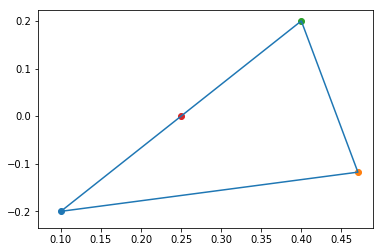

5
circumcenter: (0.24999999999999997, 5.551115123125783e-17)
circumcircle radius: 0.250000


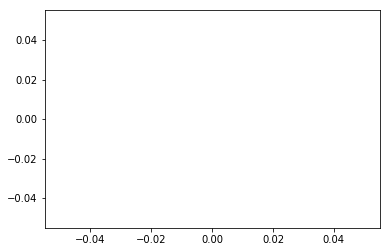

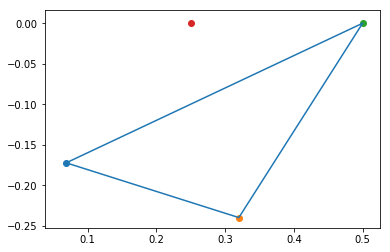

6
circumcenter: (0.25, 5.551115123125783e-17)
circumcircle radius: 0.250000


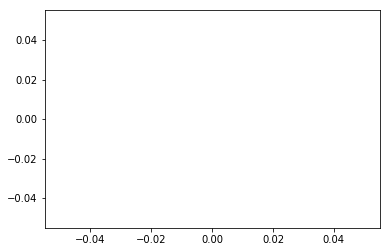

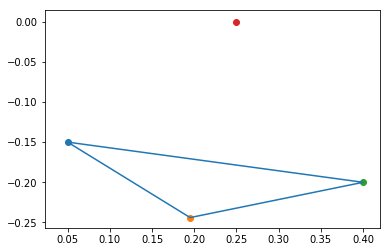

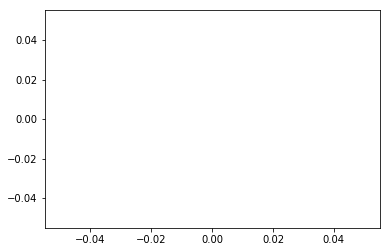

In [388]:
fig = plt.figure()
#ax = fig.gca(projection='3d')

# Make data.
X = w
Y = w
X, Y = np.meshgrid(X, Y)
Z1 = lor(4,X,0)[0] * lor(4,Y,0)[1]
Z2 = lor(4,X,-3.5)[0] * lor(4,Y,-3.5)[1]
Z3 = lor(4,X,-7)[0] * lor(4,Y,-7)[1]

# Plot the surface.
# surf = ax.scatter3D(w,lor(2,w,0)[0],lor(2,w,0)[1])
# surf = ax.scatter3D(w,lor(2,w,-3.5)[0],lor(2,w,-3.5)[1])
# surf = ax.scatter3D(w,lor(2,w,-5)[0],lor(2,w,-5)[1])
w_selection = [-5,-3,0,1,3,4,5,6]
for ws in w_selection:
    fig, ax = plt.subplots(1)
    g, e, f = lor(2,ws,0), lor(2,ws,-3.5), lor(2,ws,-5)
    print(ws)
    ax.scatter(g[0],g[1])
    ax.scatter(e[0],e[1])
    ax.scatter(f[0],f[1])
    circumcenter(g,e,f, show=True, ax=ax)
    ax.set_ylim([])
    
    plt.plot()

In [396]:
foo=False
{i: "abc" + "_" if foo else "" + "def" for i in [0,1,2]}

{0: 'def', 1: 'def', 2: 'def'}

(0.5, 0.0) (1.5, 0.4330127018922193)
(-0.0, 0.0) (0.8660254037844386, -0.8660254037844386)
1000000000000.0 -1.1547005383792517
circumcenter: (0.5000000000015877, 1.587713240269638)
circumcircle radius: 1.664582


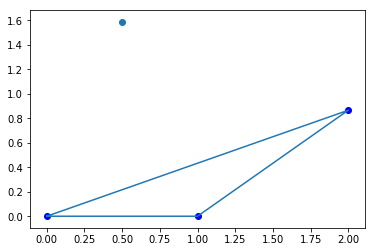

angle 2  1.1621584716967253
angle 3  -0.8570719478495521


In [342]:
p1 = (0,0.)
p2 = (1,0.)
p3 = (2,np.sqrt(3)/2)
plt.scatter(p1[0], p1[1], color='b')
plt.scatter(p2[0], p2[1], color='b')
plt.scatter(p3[0], p3[1], color='b')
c, R = circumcenter(p1,p2,p3, show=True)
angle3pt(p1,p3,c)*180/np.pi
print("angle 2 ", angle3pt(p3,p2,c))
print("angle 3 ", angle3pt(p1,p3,c))


In [ ]:
np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])

# Real Data Analysis

In [6]:
from pycqed.analysis import measurement_analysis as ma
from pycqed.instrument_drivers.meta_instrument.qubit_objects.QuDev_transmon import QuDev_transmon
from pycqed.measurement import measurement_control as mc
from pycqed.utilities import general as gen
from IPython.display import clear_output
try:
    MC = mc.MeasurementControl('MC')
    qb1 = QuDev_transmon('qb1', MC)
    qb2 = QuDev_transmon('qb2', MC)
    qb3 = QuDev_transmon('qb3', MC)
    qb4 = QuDev_transmon('qb4', MC)
except KeyError as e:
    print(e)
MC.datadir(a_tools.datadir)

qubits = [qb1, qb2, qb3, qb4]

c:\users\nathan\masterthesis\code\controlsoftware\pycqed_py3\data


In [42]:
timestamp = "20190528_110546" #qb1
#timestamp = "20190528_150331" #qb2
for qb in qubits:
    gen.load_settings(qb, timestamp=timestamp)
    qb.f_pulse_mod(-100e6)
clear_output()
for qb in qubits:
    print("{}:\nRO_freq = {}\nQb_freq = {}\n".format(qb.name, qb.f_RO()/1e9, qb.f_ef_qubit()/1e9))


qb1:
RO_freq = 6.892
Qb_freq = 5.447611521803531

qb2:
RO_freq = 7.0885
Qb_freq = 4.932198046269718

qb3:
RO_freq = 6.6895
Qb_freq = 4.606952411285809

qb4:
RO_freq = 6.486
Qb_freq = 4.113489313879902



In [47]:
freqs = None
self = qb1
if freqs is None:
    if self.f_RO() is not None:
        f_span = 20e6
        fmin = self.f_RO() - f_span
        fmax = self.f_RO() + f_span
        n_freq =  401
        freqs = np.linspace(fmin, fmax, n_freq)
    else:
        raise ValueError("Unspecified frequencies for find_resonator_"
                         "frequency and no previous value exists")

levels = ('g', 'e', 'f') 

labels = {l: '{}-spec'.format(l) + self.msmt_suffix for l in levels}
m_a = {l: ma.MeasurementAnalysis(label=labels[l]) for l in levels}
trace = {l: m_a[l].measured_values[0] *
            np.exp(1j * np.pi * m_a[l].measured_values[1] / 180.)
         for l in levels}

Q:\USERS\nathan\data\20190528\110546_g-spec_qb1\g-spec_qb1_measured_values_vs_Heterodyne frequency.png ::loc
Q:\USERS\nathan\data\20190528\111400_e-spec_qb1\e-spec_qb1_measured_values_vs_Heterodyne frequency.png ::loc
Q:\USERS\nathan\data\20190528\112220_f-spec_qb1\f-spec_qb1_measured_values_vs_Heterodyne frequency.png ::loc


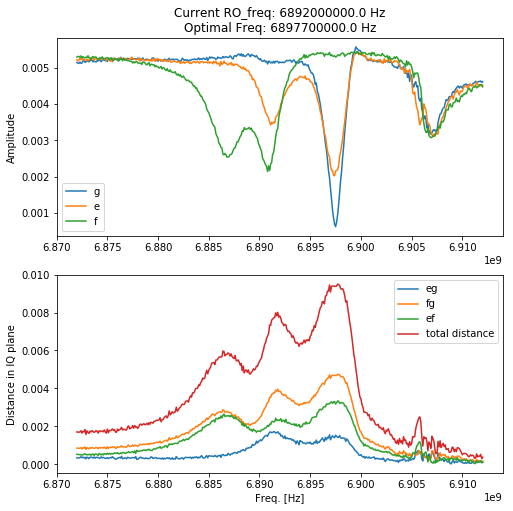

In [49]:
total_dist = np.abs(trace['e'] - trace['g']) + \
             np.abs(trace['f'] - trace['g']) + \
             np.abs(trace['f'] - trace['e'])
fmax = freqs[np.argmax(total_dist)]
# FIXME: just as debug plotting for now
fig, ax = plt.subplots(2, figsize=(8,8))
ax[0].plot(freqs, np.abs(trace['g']), label='g')
ax[0].plot(freqs, np.abs(trace['e']), label='e')
ax[0].plot(freqs, np.abs(trace['f']), label='f')
ax[0].set_ylabel('Amplitude')
ax[0].legend()
ax[1].plot(freqs, np.abs(trace['e'] - trace['g']), label='eg')
ax[1].plot(freqs, np.abs(trace['f'] - trace['g']), label='fg')
ax[1].plot(freqs, np.abs(trace['e'] - trace['f']), label='ef')
ax[1].plot(freqs, total_dist, label='total distance')
ax[1].set_xlabel("Freq. [Hz]")
ax[1].set_ylabel('Distance in IQ plane')
ax[0].set_title("Current RO_freq: {} Hz\nOptimal Freq: {} Hz".format(
    self.f_RO(),
                                                              fmax))
plt.legend()

#m_a['g'].save_fig(fig, 'IQplane_distance')
plt.show()
fmax = freqs[np.argmax(np.abs(trace['e'] - trace['g']))]

In [52]:
%matplotlib inline

In [50]:
%matplotlib qt

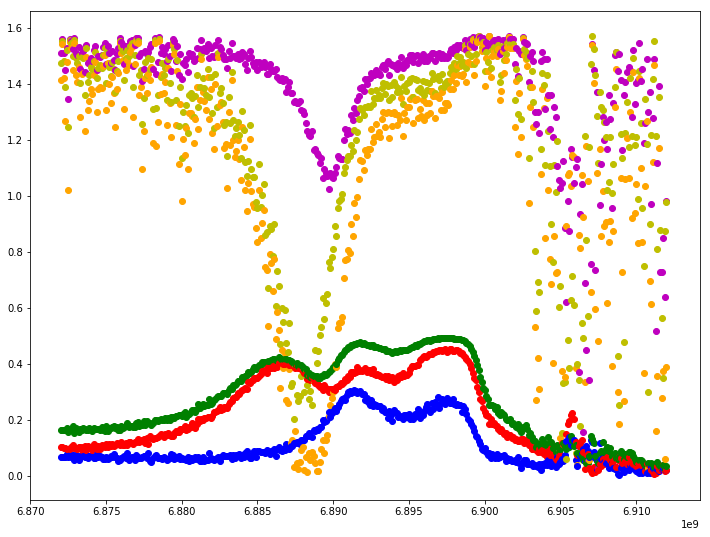

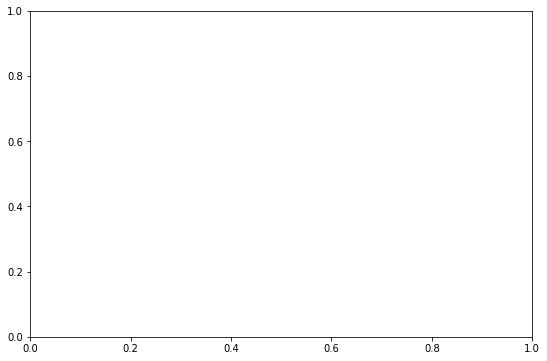

6896900000.0


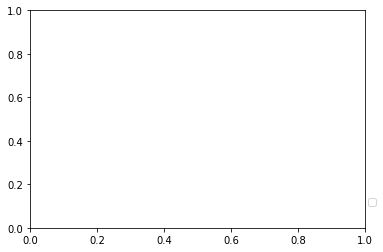

In [53]:
w = freqs#[:-11]
cropped_dist = total_dist#[:-11]
scale_up = 50
verbose = True
sigmas = [0.001] #np.logspace(-4.5,-3, 8) #[0.001]
fig, ax = plt.subplots(figsize=(12,9))
fig2, ax2 = plt.subplots(1, figsize=(9,6))
fmaxs = []
avg_fidelity = []
for sigma in sigmas:
    i1s, i2s, i3s = [],[],[]
    e1s, e2s, e3s = [],[],[]
    for i, spec_g, spec_e, spec_f in zip(w, trace['g'], trace['e'], trace['f']):
        pt1 = (spec_g.real, spec_g.imag)
        pt2 = (spec_e.real, spec_e.imag)
        pt3 = (spec_f.real, spec_f.imag)
        d1 = distance(pt1, pt2)/2
        d2 = distance(pt2,pt3)/2
        d3 = distance(pt1,pt3)/2
        #translate to point1
        pt2 = tuple(np.asarray(pt2) - np.asarray(pt1))
        pt3 = tuple(np.asarray(pt3) - np.asarray(pt1))
        pt1 = (0.,0.)
        c, R = circumcenter(pt2, pt3 ,pt1, show=False)
        gamma1 = np.arccos(d1/R)
        gamma2 = np.arccos(d2/R) #if angle3pt(pt3,pt2, c) > 0  else - np.arccos(d2/R)
        gamma3 = np.arccos(d3/R) #if angle3pt(pt1,pt3, c) > 0 else - np.arccos(d3/R)
        i1 = integrate.quad(lambda x: 1/(2*np.pi), gamma1-np.pi, gamma1)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x, d1, sigma=sigma), gamma1-np.pi, gamma1)[0]
        i2 = integrate.quad(lambda x: 1/(2*np.pi), gamma2-np.pi, gamma2)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d2, sigma=sigma), gamma2-np.pi, gamma2)[0]
        i3 = integrate.quad(lambda x: 1/(2*np.pi), gamma3-np.pi, gamma3)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d3,sigma=sigma), gamma3-np.pi, gamma3)[0]
        i1s.append(i1)
        i2s.append(i2)
        i3s.append(i3)
#         e1 = integrate.quad(lambda x: 1/(2*np.pi), gamma1-np.pi, gamma1)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d1,sigma=sigma), gamma1-np.pi, gamma1)[1]
#         e2 = integrate.quad(lambda x: 1/(2*np.pi), gamma2-np.pi, gamma2)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d2, sigma=sigma), gamma2-np.pi, gamma2)[1]
#         e3 = integrate.quad(lambda x: 1/(2*np.pi), gamma3-np.pi, gamma3)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d3,sigma=sigma), gamma3-np.pi, gamma3)[1]
#         e1s.append(e1)
#         e2s.append(e2)
#         e3s.append(e2)
    #     ixy1 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d1, lambda x: -np.inf, lambda x: getLine((0.,0.),c)[0]*x)[0]
    #     a2= angle((1,0),pt2) - np.pi
    #     c2 = rotate(c, a2)
    #     c2 = tuple(np.array(c2) - np.array(pt2))
    #     ixy2 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d2, lambda x: -np.inf, lambda x: getLine((0.,0.),c2)[0]*x)[0]
    #     a3 = angle((1,0),pt3) - np.pi
    #     c3 = rotate(c, a3)
    #     c3 = tuple(np.array(c3) - np.array(pt3))
    #     ixy3 = integrate.dblquad(lambda y, x: 1/(np.pi)*np.exp(-x**2)*np.exp(-y**2), -np.inf, d3, lambda x: -np.inf, lambda x: getLine((0.,0.),c3)[0]*x)[0]
        if verbose:
            #print("d1 = {} d2 = {} d3 = {}".format(d1, d2, d3))
            #print("c = {} R = {}".format(c, R))
            #print("g1 = {} g2 = {} g3 = {}".format(gamma1, gamma2, gamma3))
            #print("i1 = {} i2 = {} i3 = {}".format(i1, 0, 0))
            #print("angle 2 = {}, angle3 = {}".format(angle3pt(pt3,pt2, c),angle3pt(pt1,pt3, c)))
            ax.scatter(i, gamma1, color='m')
            ax.scatter(i, gamma2, color='y')
            ax.scatter(i, gamma3, color='orange')
            #ax.scatter(i, g(i,d1), color='k')
            ax.scatter(i, i1, color='b')
            ax.scatter(i, i2, color='r')
            ax.scatter(i, i3, color='g')
            # error
            #ax.scatter(i, e1, color='cyan')
            #ax.scatter(i, e2, color='k')
            #ax.scatter(i, e3, color='orange')
    total_area = 2*np.array(i1s) + 2*np.array(i2s) + 2*np.array(i3s)
    avg_fidelity.append(np.max(total_area/3))
    fmax = w[np.argmax(total_area)]
    fmaxs.append(fmax)
    plt.show()
    if len(sigmas) == 1.:
        ax2.plot(w, np.array(i1s) + np.array(i3s), "-o",label = "g" )
        ax2.plot(w, np.array(i1s) + np.array(i2s), "-o", label = "e" )
        ax2.plot(w, np.array(i2s) + np.array(i3s), "-o", label = "f" )
    ax2.plot(w, total_area/3, label="sum sigma {}".format(sigma), alpha=1)
    plt.legend(loc=[1.01, 0.1])
    print(fmax)
ax2.plot(w, cropped_dist*scale_up + 0.5, "--", label='naive sum of dist in IQ x {}'.format(scale_up))
plt.legend(loc=[1.01, 0.1])
plt.show()


0.001


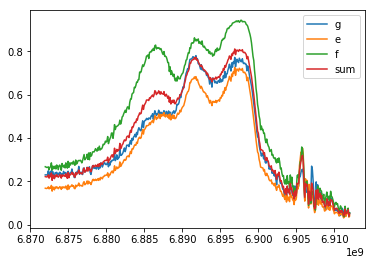

In [54]:
plt.plot(w, np.array(i1s) + np.array(i3s), label = "g" )
plt.plot(w, np.array(i1s) + np.array(i2s), label = "e" )
plt.plot(w, np.array(i2s) + np.array(i3s), label = "f" )
plt.plot(w, total_area/3, label="sum")
print(sigma)
plt.legend()

In [109]:
%matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = w
Y = w
X, Y = np.meshgrid(X, Y)
Z1 = [trace['g'].real[:-110], trace['g'].imag[:-110]]
Z2 = [trace['e'].real[:-110], trace['e'].imag[:-110]]
Z3 = [trace['f'].real[:-110], trace['f'].imag[:-110]]
ax.set_xlabel('freq')
ax.set_ylabel('I')
ax.set_zlabel('Q')
# Plot the surface.
surf = ax.plot3D(w, Z1[0], Z1[1],label='g')
surf = ax.plot3D(w, Z2[0], Z2[1], label='e')
surf = ax.plot3D(w, Z3[0], Z3[1], label='f')
plt.legend()


In [28]:
%matplotlib inline

In [124]:
from ipywidgets import interactive, fixed, FloatSlider
#fig, ax3 = plt.subplots(1)
def f(freq, traces, all_freqs, fixed_lims):
    i = np.argwhere(freq*1e6 == all_freqs)
    x = traces['g'][i]
    y = traces['e'][i]
    z = traces['f'][i]
    plt.figure(1)
    plt.scatter(x.real, x.imag, label='g')
    plt.scatter(y.real, y.imag, label='e')
    plt.scatter(z.real, z.imag, label='f')
    pt1 = (x.real, x.imag)
    pt2 = (y.real, y.imag)
    pt3 = (z.real, z.imag)
    try:
        c, R = circumcenter(pt1,pt2,pt3, show=False)
        plt.scatter(c[0], c[1], color='k')
    except:
        pass
    if fixed_lims:
        #plt.xlim([-0.006, 0.006])
        #plt.ylim([-0.006, 0.006])
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        
    else:
        max_x = np.max([x.real, y.real, z.real])
        min_x = np.min([x.real, y.real, z.real])
        max_y = np.max([x.imag, y.imag, z.imag])
        min_y = np.min([x.imag, y.imag, z.imag])
        margin = 0.01
        #xlims = [(1+margin)*xl for xl in [min_x, max_x] if]
        plt.xlim([(1-margin)*min_x, (1+margin)*max_x])
        plt.ylim([(1-margin)*min_y, (1+margin)*max_y])
    plt.show()

freqs_widget = FloatSlider(min=w2[0]/1e6, max=w2[-1]/1e6, step=(w2[1]-w2[0])/1e6)
interactive_plot = interactive(f, freq=freqs_widget, traces = fixed(traces_theory), all_freqs=fixed(w2), fixed_lims=True)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=7000.0, description='freq', max=7099.0, min=7000.0, step=1.0), Checkbo…

In [148]:
from collections import OrderedDict
def find_sigma(spec_traces, freqs, bounds=[0.0001, 0.01]):
    n_iter = 0
    avg_fidelities = OrderedDict()
    single_level_fidelities = dict()
    optimal_frequency = []
    sigmas_lower_bound = [bounds[0]]
    sigmas_higher_bound = [bounds[1]]
    sigmas = (sigmas_lower_bound, sigmas_higher_bound)
    while search_condition(avg_fidelities, sigmas_lower_bound, sigmas_higher_bound, 
                           freqs, optimal_frequency, n_iter):
        print(n_iter)
        sigma = sigmas_higher_bound[-1]
        if sigma in avg_fidelities.keys():
            continue
        else:
            avg_fidelity, single_level_fidelity = evaluate_fidelity(spec_traces, freqs, sigma)
            avg_fidelities[sigma] = avg_fidelity
            single_level_fidelities[sigma] = single_level_fidelity
            n_iter += 1
    return avg_fidelities, sigmas_lower_bound, sigmas_higher_bound, optimal_frequency

def search_condition(avg_fidelities, sigmas_lower_bound, sigmas_higher_bound, freqs, optimal_frequency,
                     n_iter, n_iter_max=20, target_fidelity=0.999,
                     max_width_at_max_fid=0.1e6):
    continue_search = True
    if n_iter >= n_iter_max:
        print("Warning: Could not converge to a proper frequency" \
              "within {} iterations. Returning best frequency found so far. Consider changing" \
              "log_bounds".format(n_iter_max))
        continue_search = False
    elif len(avg_fidelities.keys()) == 0:
        # search has not started yet
        continue_search = True
    else:
        delta_freq = freqs[1]-freqs[0]
        sigma_high = sigmas_higher_bound[-1]
        #reversed_dict = reversed(avg_fidelities)
        #sigma_current = next(reversed_dict)
        fid, idx_width = fidelity_and_width(avg_fidelities[sigma_high], target_fidelity)
        width = idx_width * (delta_freq) 
        
        print("sigmas " + str(sigmas_higher_bound) + " width: " + str(width/1e6))
        optimal_frequency.append(freqs[np.argmax(avg_fidelities[sigma_high])])
        
        #sigma_previous = next(reversed_dict)
        #fid_previous, idx_width_previous = fidelity_and_width(avg_fidelities[sigma_previous], target_fidelity)
        #width_previous = idx_width_previous * (delta_freq)
        

        if len(sigmas_higher_bound) == 1:
            sigma_previous = 10**(np.log10(sigmas_higher_bound[-1]) + 1)
            #sigma_previous = 2*sigmas_higher_bound[-1]
        else:
            sigma_previous = sigmas_higher_bound[-2]
        log_diff =  np.log10(sigma_previous) - np.log10(sigmas_higher_bound[-1])
        #log_diff =  sigma_previous - sigmas_higher_bound[-1]
        print("logdiff " + str(log_diff))
        if fid >= target_fidelity and width <= max_width_at_max_fid:
            # succeeded
            continue_search = False
        elif fid >= target_fidelity and width > max_width_at_max_fid:
            # sigma is too small, update lower bound
            if log_diff < 0:
                sigma_high_new = 10**(np.log10(sigma_high) - np.abs(log_diff)/2)
            else:
                sigma_high_new = 10**(np.log10(sigma_high) + np.abs(log_diff))
            print("update sigma to : " + str(sigma_high_new))
            sigmas_higher_bound.append(sigma_high_new)
        elif fid < target_fidelity:
            print(np.all(np.diff(sigmas_higher_bound) < 0))
            # sigma is too high, update higher bound
            if np.all(np.diff(sigmas_higher_bound) < 0):
                sigma_high_new = 10**(np.log10(sigma_high) - log_diff)
            else:
                sigma_high_new = 10**(np.log10(sigma_high) - np.abs(log_diff)/2)
            print("update higher bound to : " + str(sigma_high_new))
            sigmas_higher_bound.append(sigma_high_new)
    return continue_search

def fidelity_and_width(avg_fidelity, target_fidelity):
    avg_fidelity = np.array(avg_fidelity)
    max_fid = np.max(avg_fidelity)
    idx_width = np.sum((avg_fidelity >= target_fidelity)*(avg_fidelity <= 1.))
    return max_fid, idx_width

In [139]:

def evaluate_fidelity(spec_traces, freqs, sigma):
    fmaxs = []
    i1s, i2s, i3s = [],[],[]
    for i, spec_g, spec_e, spec_f in zip(freqs, spec_traces['g'], spec_traces['e'], spec_traces['f']):
        pt1 = (spec_g.real, spec_g.imag)
        pt2 = (spec_e.real, spec_e.imag)
        pt3 = (spec_f.real, spec_f.imag)
        d1 = distance(pt1, pt2)/2
        d2 = distance(pt2,pt3)/2
        d3 = distance(pt1,pt3)/2
        #translate to point1
        pt2 = tuple(np.asarray(pt2) - np.asarray(pt1))
        pt3 = tuple(np.asarray(pt3) - np.asarray(pt1))
        pt1 = (0.,0.)
        c, R = circumcenter(pt2, pt3 ,pt1, show=False)
        gamma1 = np.arccos(d1/R)
        gamma2 = np.arccos(d2/R) #if angle3pt(pt3,pt2, c) > 0  else - np.arccos(d2/R)
        gamma3 = np.arccos(d3/R) #if angle3pt(pt1,pt3, c) > 0 else - np.arccos(d3/R)
        i1 = integrate.quad(lambda x: 1/(2*np.pi), gamma1-np.pi, gamma1)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d1,sigma=sigma), gamma1-np.pi, gamma1)[0]
        i2 = integrate.quad(lambda x: 1/(2*np.pi), gamma2-np.pi, gamma2)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d2, sigma=sigma), gamma2-np.pi, gamma2)[0]
        i3 = integrate.quad(lambda x: 1/(2*np.pi), gamma3-np.pi, gamma3)[0] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d3,sigma=sigma), gamma3-np.pi, gamma3)[0]
        
        e1 = integrate.quad(lambda x: 1/(2*np.pi), gamma1-np.pi, gamma1)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d1,sigma=sigma), gamma1-np.pi, gamma1)[1]
        e2 = integrate.quad(lambda x: 1/(2*np.pi), gamma2-np.pi, gamma2)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d2, sigma=sigma), gamma2-np.pi, gamma2)[1]
        e3 = integrate.quad(lambda x: 1/(2*np.pi), gamma3-np.pi, gamma3)[1] - 1/(2*np.pi)*integrate.quad(lambda x: g(x,d3,sigma=sigma), gamma3-np.pi, gamma3)[1]
        i1s.append(i1)
        i2s.append(i2)
        i3s.append(i3)
        e1s.append(e1)
        e2s.append(e2)
        e3s.append(e2)
    total_area = 2*np.array(i1s) + 2*np.array(i2s) + 2*np.array(i3s)
    avg_fidelity = total_area/3
    single_level_fid = None
    return avg_fidelity, single_level_fid
    


In [149]:
avg_fidelities, sigmas_lower_bound, sigmas_higher_bound, optimal_frequency = find_sigma(trace, freqs)

0
100000.0
sigmas [0.01] width: 0.0
logdiff 1.0
True
update higher bound to : 0.001
1
100000.0
sigmas [0.01, 0.001] width: 0.0
logdiff 1.0
True
update higher bound to : 0.0001
2
100000.0
sigmas [0.01, 0.001, 0.0001] width: 12.2
logdiff 1.0
update sigma to : 0.001
3
100000.0
sigmas [0.01, 0.001, 0.0001, 0.001] width: 0.0
logdiff -1.0
False
update higher bound to : 0.00031622776601683794
3
100000.0
sigmas [0.01, 0.001, 0.0001, 0.001, 0.00031622776601683794] width: 0.0
logdiff 0.5
False
update higher bound to : 0.00017782794100389227
4
100000.0
sigmas [0.01, 0.001, 0.0001, 0.001, 0.00031622776601683794, 0.00017782794100389227] width: 9.3
logdiff 0.25
update sigma to : 0.00031622776601683794
5
100000.0
sigmas [0.01, 0.001, 0.0001, 0.001, 0.00031622776601683794, 0.00017782794100389227, 0.00031622776601683794] width: 0.0
logdiff -0.25
False
update higher bound to : 0.00023713737056616554
5
100000.0
sigmas [0.01, 0.001, 0.0001, 0.001, 0.00031622776601683794, 0.00017782794100389227, 0.00031622

In [56]:
%matplotlib qt

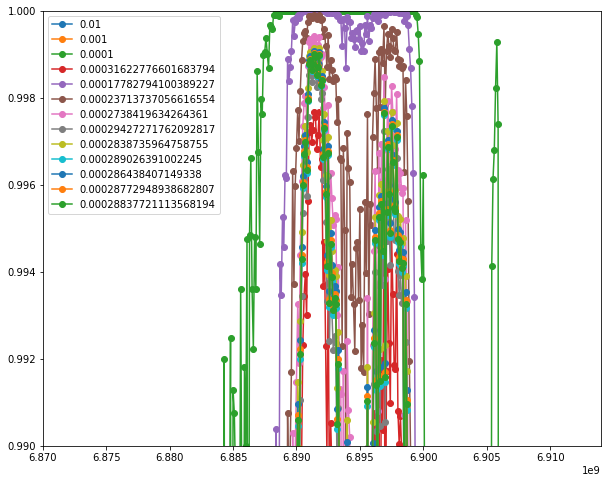

In [147]:
fig, ax = plt.subplots(1, figsize=[10,8])
for s, f in avg_fidelities.items():
    ax.plot(freqs, f, "-o", label=s)
    ax.set_ylim([0.99,1])
    #ax.set_yscale('log')
    #plt.gca().invert_yaxis()
#ax.plot(freqs, total_dist*scale_up + 0.5, "--", label='naive sum of dist in IQ x {}'.format(scale_up))
plt.legend()
plt.show()

In [135]:
optimal_frequency

[6897700000.0,
 6896900000.0,
 6891000000.0,
 6896900000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0]

In [132]:
optimal_frequency

[6897700000.0,
 6896900000.0,
 6891000000.0,
 6891000000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0,
 6891400000.0]

In [142]:
plt.plot(freqs[:100], total_dist[:100*scale_up + 0.5], "--", label='naive sum of dist in IQ x {}'.format(scale_up))
plt.legend()

TypeError: slice indices must be integers or None or have an __index__ method